<a href="https://colab.research.google.com/github/myke11j/fast-ai-deep-learning-course/blob/master/Lesson_2_Image_classification_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 2: Data cleaning and production; SGD from scratch

This is chapter two of FastAI deepalearning course. In course they build a classifer to classifier three classes: bear, black teddy, and a grizzly teddy.
  But to make things little different I'm classifying diffiernt colors of teddies, mainly black, white and red.
  
  Link of course: https://course.fast.ai/videos/?lesson=2

# Import libraries

In [0]:
# from fastai.vision import * # never use in production
from fastai.vision.data import download_images, verify_images, ImageDataBunch, imagenet_stats
from fastai.vision.learner import create_cnn
from fastai.vision.models import resnet34, resnet50
from fastai.vision.learner import ClassificationInterpretation
from fastai.vision.image import open_image
from fastai.imports import Path
from fastai.vision.transform import get_transforms
from fastai.metrics import error_rate
import numpy as np

# Collect and store data on server machine

To download links of all images shown in google search

```
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```



In [0]:
folders_to_create = ['black', 'white', 'red']
for folder in folders_to_create:
  path = Path('data/teddy')
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)

In [9]:
path.ls()

[PosixPath('data/teddy/black'),
 PosixPath('data/teddy/red'),
 PosixPath('data/teddy/white')]

Now we will upload files of urls from google image search. Doesn't matter what is the name of file in your local machine, we will rename it in next step anyway.

Run below cell, as many times to upload multiple files

In [31]:
from google.colab import files
uploaded = files.upload()

Saving black_teddy_bear.csv to black_teddy_bear.csv


In [32]:
!ls

black_teddy_bear.csv  data  sample_data


Edit the below shell command to move correct files

In [0]:
!mv black_teddy_bear.csv data/teddy/black/black_teddy_bear.csv
!mv white_teddy_bear.csv data/teddy/white/white_teddy_bear.csv
!mv red_teddy_bear.csv data/teddy/red/red_teddy_bear.csv

In [17]:
path.ls()

[PosixPath('data/teddy/black'),
 PosixPath('data/teddy/red'),
 PosixPath('data/teddy/white')]

In [0]:
classes = ['black', 'white', 'red'] # Should not have repeated the list it again

In [0]:
file = 'black_teddy_bear.csv'
folder = 'black'
download_images(path/folder/file, path/folder, max_pics=200, max_workers=0)

file = 'white_teddy_bear.csv'
folder = 'white'
download_images(path/folder/file, path/folder, max_pics=200, max_workers=0)

file = 'red_teddy_bear.csv'
folder = 'red'
download_images(path/folder/file, path/folder, max_pics=200, max_workers=0)

In [0]:
print(classes)
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [47]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'red', 'white'], 3, 224, 56)

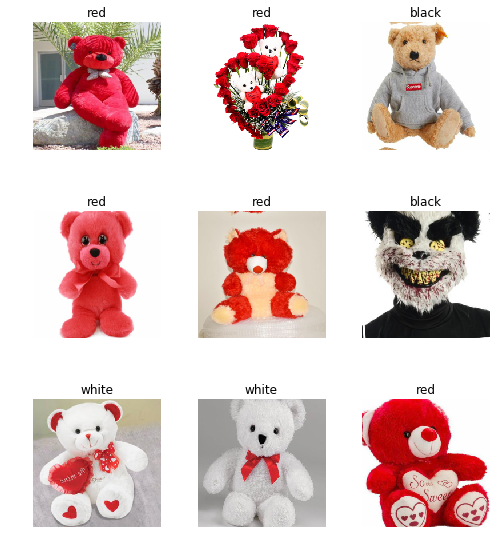

In [48]:
data.show_batch(rows=3, figsize=(7,8))

# Train the model resnet34

In [58]:
learner_resnet34 = create_cnn(data, resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [59]:
learner_resnet34.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.360545,1.022672,0.464286,00:05
1,1.161818,0.474556,0.160714,00:05
2,0.894151,0.301633,0.125000,00:05
3,0.720835,0.276923,0.125000,00:05
4,0.615996,0.349524,0.160714,00:05
5,0.540210,0.396189,0.125000,00:05
6,0.468136,0.420944,0.125000,00:05
7,0.420401,0.436401,0.125000,00:05


In [0]:
learner_resnet34.save('stage-1-resnet34')


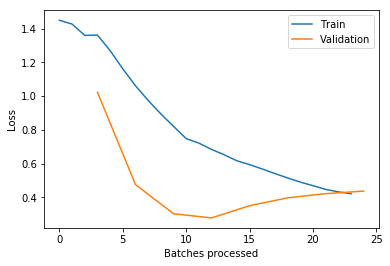

In [61]:
learner_resnet34.recorder.plot_losses()

In [0]:
learner_resnet34.unfreeze()


In [64]:
learner_resnet34.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


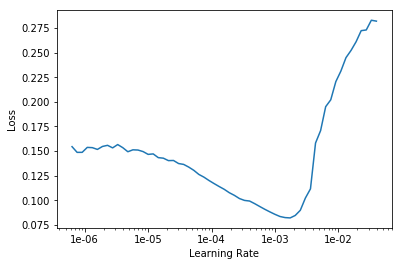

In [65]:
learner_resnet34.recorder.plot()

In [67]:
learner_resnet34.fit_one_cycle(2, max_lr=slice(1e-05, 1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.251857,0.800483,0.125000,00:05
1,0.275752,0.977547,0.142857,00:06


# Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learner_resnet34)

In [69]:
interp.confusion_matrix()

array([[21,  1,  0],
       [ 2, 11,  2],
       [ 1,  2, 16]])

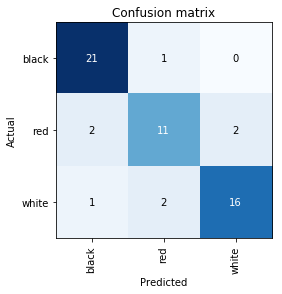

In [70]:
interp.plot_confusion_matrix()

# Reviwing false positives



In [0]:
losses, idxs = interp.top_losses(20)

In [87]:
data.valid_ds.x.items[idxs]

array([PosixPath('data/teddy/red/00000016.jpg'), PosixPath('data/teddy/white/00000086.jpg'),
       PosixPath('data/teddy/white/00000053.jpeg'), PosixPath('data/teddy/red/00000024.png'),
       PosixPath('data/teddy/red/00000075.jpg'), PosixPath('data/teddy/red/00000099.jpg'),
       PosixPath('data/teddy/white/00000036.jpeg'), PosixPath('data/teddy/black/00000092.png'),
       PosixPath('data/teddy/white/00000081.jpg'), PosixPath('data/teddy/red/00000006.jpeg'),
       PosixPath('data/teddy/black/00000070.jpg'), PosixPath('data/teddy/black/00000098.jpg'),
       PosixPath('data/teddy/white/00000087.jpg'), PosixPath('data/teddy/red/00000073.jpeg'),
       PosixPath('data/teddy/white/00000044.jpg'), PosixPath('data/teddy/white/00000066.jpg'),
       PosixPath('data/teddy/red/00000019.jpeg'), PosixPath('data/teddy/white/00000076.jpg'),
       PosixPath('data/teddy/black/00000076.jpg'), PosixPath('data/teddy/red/00000000.jpg')], dtype=object)

In [0]:
for image in data.valid_ds.x.items[idxs]:
  print(image)


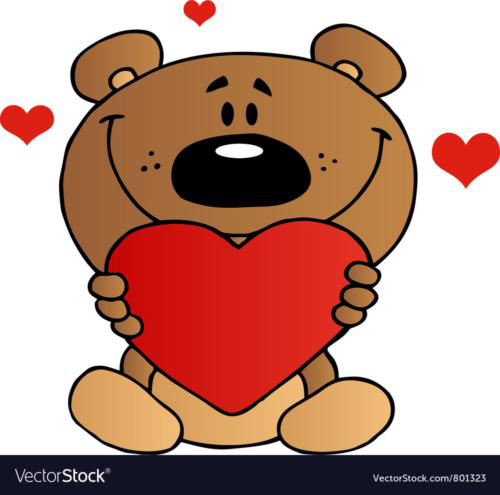

In [96]:
img = open_image('data/teddy/red/00000099.jpg')
img

In [97]:
learner_resnet34.predict(img)

(Category black, tensor(0), tensor([0.9522, 0.0385, 0.0092]))